Este notebook se trata de uma atividade do módulo de PCA do curso de ciência de dados EBAC.

O objetivo deste caderno é demonstrar como fazemos a transformação de dimensionalidade e suas consequências no processo de machine learning.

Estamos utilizando um base de dados da UCI que faz um tracing do celular de 30 pessoas durante um intervalo de tempo quando essas pessoas fazem 6 tipos de atividades diferentes.

# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [6]:
#Nome das Variáveis
filename_features = "/content/Dados/UCI HAR Dataset/features.txt"
#Rótulo das atividades humanas
filename_labels = "/content//Dados/UCI HAR Dataset/activity_labels.txt"

#3 bases para o treino
filename_subtrain = "/content//Dados/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "/content//Dados/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "/content//Dados/UCI HAR Dataset/train/y_train.txt"

#3base para o teste
filename_subtest = "/content/Dados/UCI HAR Dataset/teste/subject_test.txt"
ffilename_xtest = "/content/Dados/UCI HAR Dataset/teste/X_test.txt"
filename_ytest = "/content/Dados/UCI HAR Dataset/teste/y_test.txt"

# The 'squeeze' argument is deprecated. Read as DataFrame and then squeeze.
features = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#").squeeze("columns") # Removing 'squeeze=True' and adding .squeeze("columns") after reading the data.
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id']).squeeze("columns") # Removing 'squeeze=True' and adding .squeeze("columns") after reading the data.
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id']).squeeze("columns") # Removing 'squeeze=True' and adding .squeeze("columns") after reading the data.
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

<ipython-input-6-103116ee7d44>:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])
<ipython-input-6-103116ee7d44>:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
<ipython-input-6-103116ee7d44>:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())


## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [23]:
%%time
#treinando a árvore
clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001).fit(X_train, y_train)

#avaliando a base de teste
print(f'Acurácia na base de treino: {clf.score(X_train, y_train)*100:.1f}%')
print(f'Acurácia na base de teste: {clf.score(X_test, y_test)*100:.1f}%')


Acurácia na base de treino: 98.0%
Acurácia na base de teste: 84.7%
CPU times: user 4.82 s, sys: 5 ms, total: 4.82 s
Wall time: 6 s


## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [18]:
#setando o obejto que irá guardar as informações de como realizar o PCA
prcomp = PCA().fit(X_train)

CPU times: user 1.24 s, sys: 13.8 ms, total: 1.26 s
Wall time: 707 ms


In [21]:
#a partir desse objeto, podemos transformar agora as bases
pc_treino = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)
pc_train = pd.DataFrame(pc_treino)
pc_test = pd.DataFrame(pc_teste)

In [25]:
%%time
#treinando o modelo
clf_pca = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001).fit(pc_train, y_train)
#avaliando a base de teste
print(f'Acurácia na base de treino: {clf.score(pc_train, y_train)*100:.1f}%')
print(f'Acurácia na base de teste: {clf.score(pc_test, y_test)*100:.1f}%')

Acurácia na base de treino: 18.0%
Acurácia na base de teste: 15.4%
CPU times: user 6.54 s, sys: 4.06 ms, total: 6.54 s
Wall time: 7.65 s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Tivemos um tempo maior e uma diminuição drástica da acurácias. Isso se deve porque estavamos utilizando todas as colunas, mesmo as últimos que são colunas que masi atrapalha do que ajuda no treinamento.

## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


Agora iremos selecionar apenas as `n` colunas mais representativas.

In [26]:
%%time
n=[1,2,5,10,50]
train_scores = []
test_scores = []

for i in n:
  pc_train_2 = pc_treino[:,:i]
  pc_test_2 = pc_teste[:,:i]

  clf_pca = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001).fit(pc_train_2, y_train)
  train_scores.append(clf_pca.score(pc_train_2, y_train))
  test_scores.append(clf_pca.score(pc_test_2, y_test))





CPU times: user 969 ms, sys: 2.34 ms, total: 972 ms
Wall time: 1.56 s


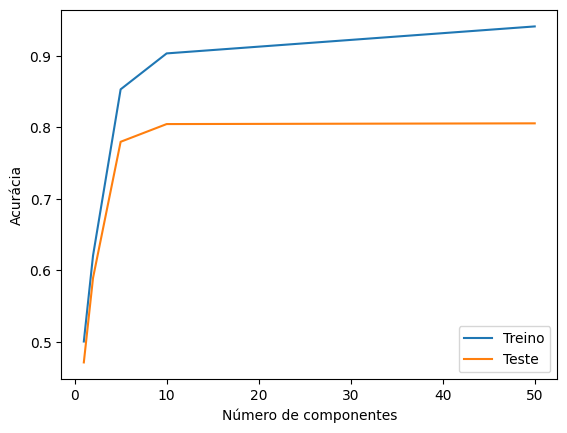

In [27]:
fig, ax = plt.subplots()
ax.set_xlabel('Número de componentes')
ax.set_ylabel('Acurácia')
ax.plot(n, train_scores, label='Treino')
ax.plot(n, test_scores, label='Teste')
ax.legend()
plt.show()


In [34]:
print(f'Melhor acurácia de treino com {n[train_scores.index(max(train_scores))]} colunas: {max(train_scores)*100:.1f}%')
print(f'Melhor acurácia de teste com {n[test_scores.index(max(test_scores))]} colunas: {max(test_scores)*100:.1f}%')

Melhor acurácia de treino com 50 colunas: 94.1%
Melhor acurácia de teste com 50 colunas: 80.6%


## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

A acurácia quando utilizamos todas as colunas diminui drásticamente. Entretando, quando utilizamos as `n` colunas mais importante, tivemos um aumento da acurácia, ainda que abaixo quando utlizamos todo o Dataset original.

Mas, os resultados ainda são muito bons e suficiente parecidos quando o utilizamos o dataset original, tendo em visto que tivemos uma grande diminuição de tempo no processamento.

E, isso foi apenas uma demonstração, talvez se aumentarmos um pouco a quantidade de colunas obtivéssemos resultados ainda melhores.